#### Module 3: Introduction to Machine Learning with Python


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read the dataset
df = pd.read_csv('/home/pydev/workflow/dt_learn_data_science/edureka/Python_Machine_Learning/ Python_ML_Training_AD/Introduction Machine Learning/cereal.csv')

1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content
across different cereals.


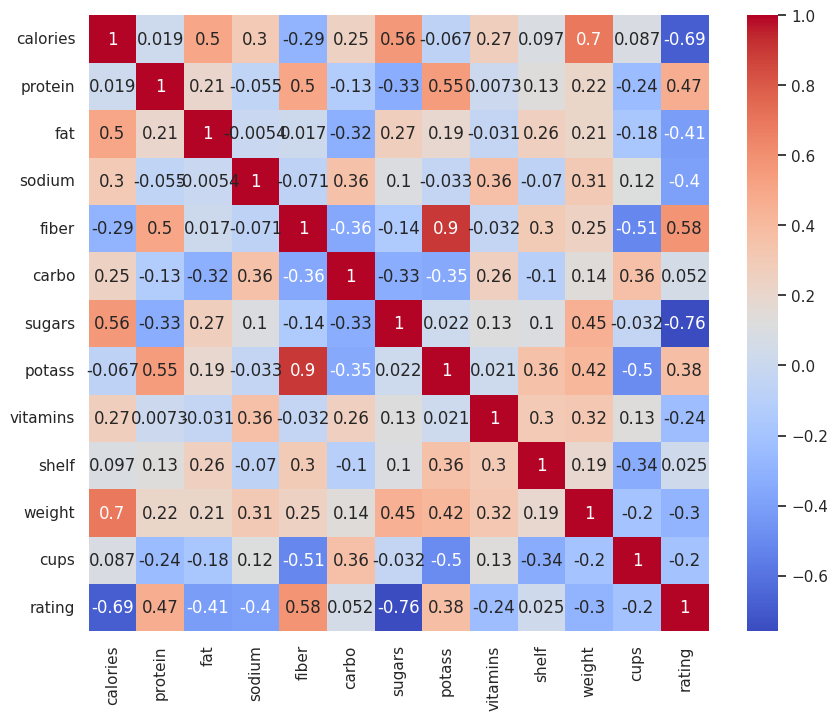

In [25]:
corr = df.corr(numeric_only=True, method='pearson')
_, ax = plt.subplots(figsize=(10, 8))
_ = sns.heatmap(corr,ax=ax, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="coolwarm")

2. The names of the manufactures are coded using alphabets, create a new column
with their full name using the below mapping. And Create a bar plot where each manufacturer is on the y axis and the height of the bars
depict the number of cereals manufactured by them.

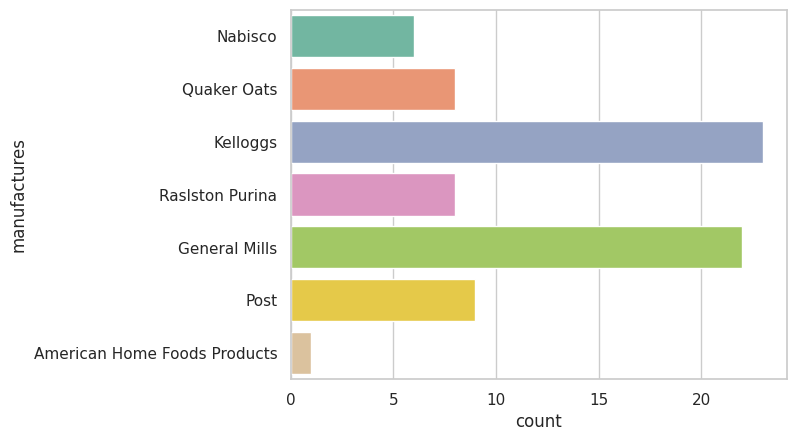

In [26]:
dict_mfr = {'N': 'Nabisco',
            'Q': 'Quaker Oats',
            'K': 'Kelloggs',
            'R': 'Raslston Purina',
            'G': 'General Mills',
            'P': 'Post',
            'A': 'American Home Foods Products'}

df["manufactures"] = [dict_mfr[mfr] for mfr in df["mfr"]]

# Create a bar plot where each manufacturer is on the y axis and the height of the bars
# depict the number of cereals manufactured by them.
sns.set_theme(style="whitegrid")
sns.countplot( data=df,  y='manufactures',palette = "Set2")
plt.show()

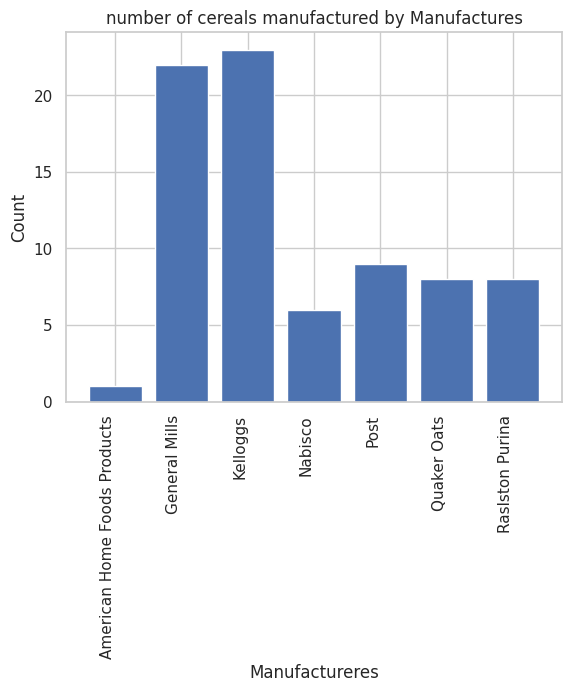

In [27]:
grouped_mfr = df.groupby(["manufactures"], as_index=False).count()
x = grouped_mfr["manufactures"]
y = grouped_mfr["mfr"]

plt.bar(x, y)

plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel("Manufactureres")
plt.ylabel("Count")
plt.title("number of cereals manufactured by Manufactures")
plt.show()

3. Extract the rating as your target variable ‘y’ and all numerical parameters as your
predictors ‘x’. Separate 25% of your data as test set.

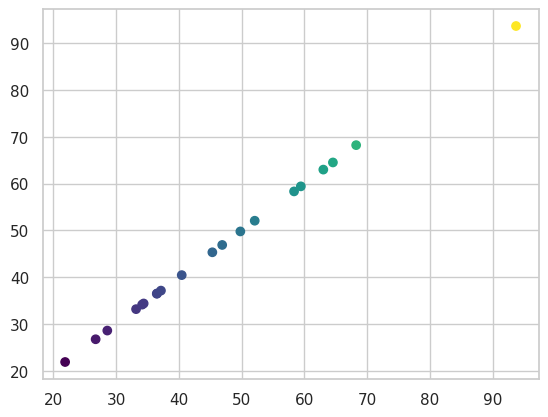

In [28]:
X = df.iloc[:, 3:15]
Y = df["rating"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)
linear_model                     = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_ratings                = linear_model.predict(x_test)

plt.scatter(np.array(predicted_ratings), np.array(y_test),c=predicted_ratings,cmap='viridis')
plt.show()
